In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
from natsort import natsorted, ns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor

/Users/Arjun/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load data and filter/organize desired columns

In [2]:
with open('riders_relative_seasons.pickle', 'rb') as handle:
    riders_points_seasons = pickle.load(handle)
    
print('riders in list of dictionaries:',len(riders_points_seasons))

riders in list of dictionaries: 1730


In [3]:
df = pd.DataFrame(riders_points_seasons)
df.head()

,S0 age,S0 pcs pts,S0 uci pts,S1 age,S1 pcs pts,S1 uci pts,S10 age,S10 pcs pts,S10 uci pts,S11 age,...,S9 uci pts,height,nationality,pct_gc_pts,pct_oneday_pts,pct_sprint_pts,pct_tt_pts,rider,seasons,weight
0,27,63.0,60.0,26.0,14.0,21.0,NaN,NaN,NaN,NaN,...,NaN,1.80,New Zealand,0.143939,0.108586,0.101010,0.646465,Aaron Gate,9,71.0
1,32,0.0,0.0,31.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,United States,0.905172,0.043103,0.043103,0.008621,Aaron Olson,6,NaN
2,28,284.0,345.0,27.0,154.0,150.0,NaN,NaN,NaN,NaN,...,0.0,1.75,Great Britain,0.160503,0.338544,0.294319,0.206634,Adam Blythe,10,68.0
3,24,45.0,92.0,23.0,18.0,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,Canada,0.089710,0.145119,0.013193,0.751979,Adam De Vos,7,NaN
4,36,85.0,24.0,35.0,153.0,93.0,26.0,78.0,0.0,25.0,...,0.0,1.86,Australia,0.465126,0.094159,0.074978,0.365737,Adam Hansen,15,75.0


In [4]:
df.shape

(1730, 84)

In [5]:
df.columns

Index(['S0 age', 'S0 pcs pts', 'S0 uci pts', 'S1 age', 'S1 pcs pts',
       'S1 uci pts', 'S10 age', 'S10 pcs pts', 'S10 uci pts', 'S11 age',
       'S11 pcs pts', 'S11 uci pts', 'S12 age', 'S12 pcs pts', 'S12 uci pts',
       'S13 age', 'S13 pcs pts', 'S13 uci pts', 'S14 age', 'S14 pcs pts',
       'S14 uci pts', 'S15 age', 'S15 pcs pts', 'S15 uci pts', 'S16 age',
       'S16 pcs pts', 'S16 uci pts', 'S17 age', 'S17 pcs pts', 'S17 uci pts',
       'S18 age', 'S18 pcs pts', 'S18 uci pts', 'S19 age', 'S19 pcs pts',
       'S19 uci pts', 'S2 age', 'S2 pcs pts', 'S2 uci pts', 'S20 age',
       'S20 pcs pts', 'S20 uci pts', 'S21 age', 'S21 pcs pts', 'S21 uci pts',
       'S22 age', 'S22 pcs pts', 'S22 uci pts', 'S23 age', 'S23 pcs pts',
       'S23 uci pts', 'S24 age', 'S24 pcs pts', 'S24 uci pts', 'S3 age',
       'S3 pcs pts', 'S3 uci pts', 'S4 age', 'S4 pcs pts', 'S4 uci pts',
       'S5 age', 'S5 pcs pts', 'S5 uci pts', 'S6 age', 'S6 pcs pts',
       'S6 uci pts', 'S7 age', 'S7 pcs pts

In [6]:
df.dtypes

S0 age              int64
S0 pcs pts        float64
S0 uci pts        float64
S1 age            float64
S1 pcs pts        float64
S1 uci pts        float64
S10 age           float64
S10 pcs pts       float64
S10 uci pts       float64
S11 age           float64
S11 pcs pts       float64
S11 uci pts       float64
S12 age           float64
S12 pcs pts       float64
S12 uci pts       float64
S13 age           float64
S13 pcs pts       float64
S13 uci pts       float64
S14 age           float64
S14 pcs pts       float64
S14 uci pts       float64
S15 age           float64
S15 pcs pts       float64
S15 uci pts       float64
S16 age           float64
S16 pcs pts       float64
S16 uci pts       float64
S17 age           float64
S17 pcs pts       float64
S17 uci pts       float64
                   ...   
S3 age            float64
S3 pcs pts        float64
S3 uci pts        float64
S4 age            float64
S4 pcs pts        float64
S4 uci pts        float64
S5 age            float64
S5 pcs pts  

In [7]:
pcs_cols = [col for col in df.columns if 'pcs pts' in col]
pcs_cols = natsorted(pcs_cols, reverse=True)
print(pcs_cols)

['S24 pcs pts', 'S23 pcs pts', 'S22 pcs pts', 'S21 pcs pts', 'S20 pcs pts', 'S19 pcs pts', 'S18 pcs pts', 'S17 pcs pts', 'S16 pcs pts', 'S15 pcs pts', 'S14 pcs pts', 'S13 pcs pts', 'S12 pcs pts', 'S11 pcs pts', 'S10 pcs pts', 'S9 pcs pts', 'S8 pcs pts', 'S7 pcs pts', 'S6 pcs pts', 'S5 pcs pts', 'S4 pcs pts', 'S3 pcs pts', 'S2 pcs pts', 'S1 pcs pts', 'S0 pcs pts']


In [8]:
age_cols = [col for col in df.columns if 'age' in col]
age_cols = natsorted(age_cols, reverse=True)
print(age_cols)

['S24 age', 'S23 age', 'S22 age', 'S21 age', 'S20 age', 'S19 age', 'S18 age', 'S17 age', 'S16 age', 'S15 age', 'S14 age', 'S13 age', 'S12 age', 'S11 age', 'S10 age', 'S9 age', 'S8 age', 'S7 age', 'S6 age', 'S5 age', 'S4 age', 'S3 age', 'S2 age', 'S1 age', 'S0 age']


In [9]:
select_cols = ['rider', 'seasons', 'height', 'weight', 'nationality', 'pct_gc_pts', 'pct_oneday_pts',
               'pct_sprint_pts', 'pct_tt_pts'] + pcs_cols + age_cols

df = df[select_cols]
df.shape

(1730, 59)

In [10]:
df.head()

,rider,seasons,height,weight,nationality,pct_gc_pts,pct_oneday_pts,pct_sprint_pts,pct_tt_pts,S24 pcs pts,...,S9 age,S8 age,S7 age,S6 age,S5 age,S4 age,S3 age,S2 age,S1 age,S0 age
0,Aaron Gate,9,1.80,71.0,New Zealand,0.143939,0.108586,0.101010,0.646465,NaN,...,NaN,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27
1,Aaron Olson,6,NaN,NaN,United States,0.905172,0.043103,0.043103,0.008621,NaN,...,NaN,NaN,NaN,NaN,22.0,28.0,29.0,30.0,31.0,32
2,Adam Blythe,10,1.75,68.0,Great Britain,0.160503,0.338544,0.294319,0.206634,NaN,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28
3,Adam De Vos,7,NaN,NaN,Canada,0.089710,0.145119,0.013193,0.751979,NaN,...,NaN,NaN,NaN,18.0,19.0,20.0,21.0,22.0,23.0,24
4,Adam Hansen,15,1.86,75.0,Australia,0.465126,0.094159,0.074978,0.365737,NaN,...,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36


### Exploratory Data Analysis
**Definitions:**
- S0 ('S0 pcs pts' is target variable) is the most recent full season specific to each rider. The incrementing season numbers indicate sequential prior seasons.
- pct_gc_pts = % of lifetime points from General Classification (stage) races
- pct_oneday_pts = % of lifetime points from One Day (often 'Classics') races
- pct_sprint_pts = % of lifetime points from Sprints (either mid-race or at finish line)
- pct_tt_pts = % of lifetime points from Time Trial (stage) races

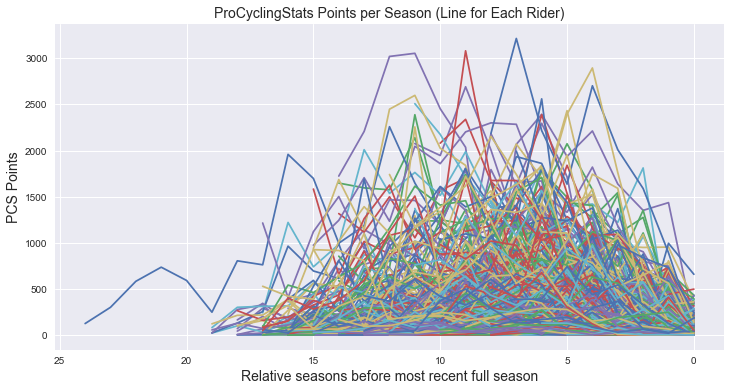

In [61]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
for row in list(range(1,len(df))):
    plt.plot(df.iloc[row,9:34].dropna().values)
plt.gca().invert_xaxis()
plt.title('ProCyclingStats Points per Season (Line for Each Rider)',size=14)
plt.xlabel('Relative seasons before most recent full season',size=14)
plt.ylabel('PCS Points',size=14)
plt.show()

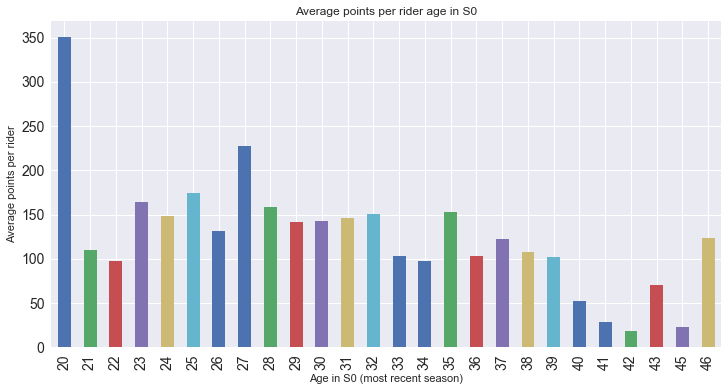

In [12]:
age_groups = df.groupby('S0 age')['S0 pcs pts'].mean()
ax = age_groups.plot.bar(figsize=(12,6), fontsize=14)
ax.set(xlabel='Age in S0 (most recent season)', ylabel='Average points per rider', title='Average points per rider age in S0');

In [13]:
# take a closer look at the 20 year-old outlier(s)
df[df['S0 age'] == 20][['rider','seasons','nationality','pct_gc_pts', 'pct_oneday_pts',
                        'pct_sprint_pts', 'pct_tt_pts','S0 pcs pts','S0 age']]

,rider,seasons,nationality,pct_gc_pts,pct_oneday_pts,pct_sprint_pts,pct_tt_pts,S0 pcs pts,S0 age
462,Egan Arley Bernal,2,Colombia,0.557617,0.199219,0.0,0.243164,645.0,20
691,Ivan Ramiro Sosa,2,Colombia,0.839286,0.160714,0.0,0.000000,57.0,20


Both performed well in the General Classification of 2017 stage races. Good to know, but I'll leave them in the data for now.

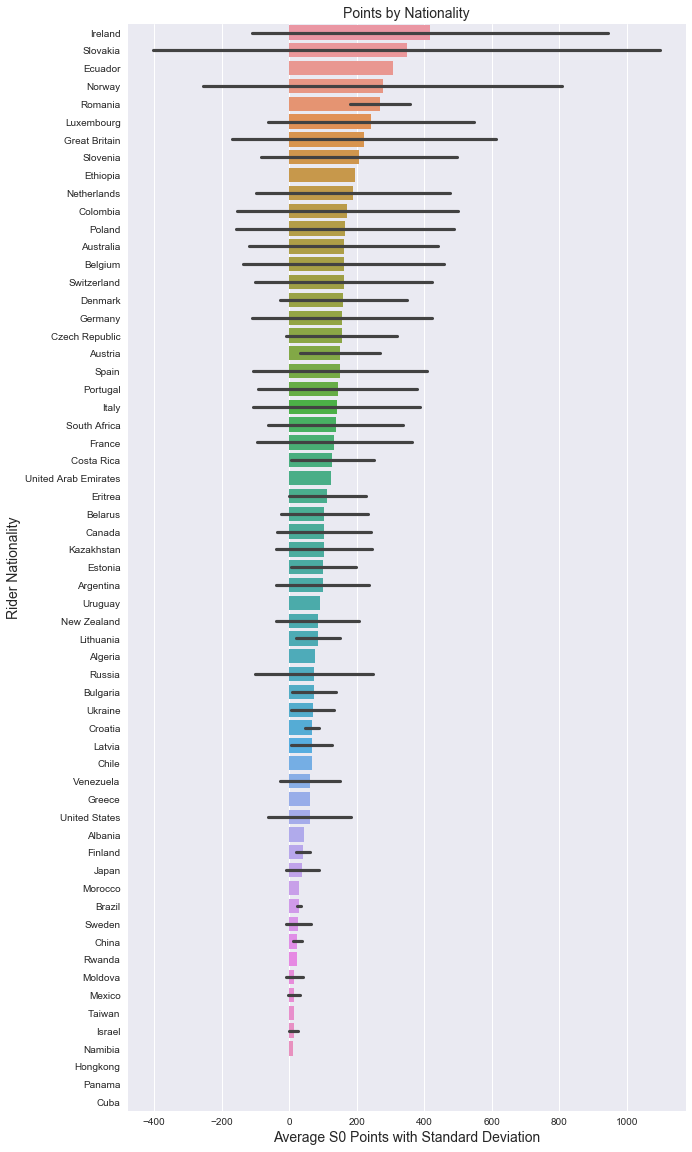

In [14]:
nations = df.groupby('nationality')['S0 pcs pts'].mean().sort_values()
nations_order = list(nations.index)
nations_order.reverse()
plt.figure(figsize=(10,20))
sns.barplot(x='S0 pcs pts', y='nationality', data=df, ci='sd', order=nations_order)
plt.title('Points by Nationality', size=14)
plt.xlabel('Average S0 Points with Standard Deviation', size=14)
plt.ylabel('Rider Nationality', size=14);

There looks to be a lot of outliers creating very high standard deviations across most nation's riders. Just a hunch but it's unlikely nationality would be a good predictor. Viewing this chart leads me to believe the distribution of points per season is not normally distributed, and will almost certainly come up later.

In [15]:
# see how drastically the sample size drops with more consecutive prior seasons and non-NaN height/weight columns
df.count()

rider             1730
seasons           1730
height            1118
weight            1130
nationality       1730
pct_gc_pts        1730
pct_oneday_pts    1730
pct_sprint_pts    1730
pct_tt_pts        1730
S24 pcs pts          1
S23 pcs pts          1
S22 pcs pts          1
S21 pcs pts          1
S20 pcs pts          1
S19 pcs pts          7
S18 pcs pts         16
S17 pcs pts         33
S16 pcs pts         66
S15 pcs pts        116
S14 pcs pts        181
S13 pcs pts        274
S12 pcs pts        381
S11 pcs pts        515
S10 pcs pts        688
S9 pcs pts         882
S8 pcs pts        1192
S7 pcs pts        1370
S6 pcs pts        1511
S5 pcs pts        1626
S4 pcs pts        1681
S3 pcs pts        1711
S2 pcs pts        1725
S1 pcs pts        1729
S0 pcs pts        1730
S24 age              1
S23 age              1
S22 age              1
S21 age              1
S20 age              1
S19 age              7
S18 age             16
S17 age             33
S16 age             66
S15 age    

In [16]:
df[df['height'].notna() & df['weight'].notna()].count()

rider             1110
seasons           1110
height            1110
weight            1110
nationality       1110
pct_gc_pts        1110
pct_oneday_pts    1110
pct_sprint_pts    1110
pct_tt_pts        1110
S24 pcs pts          1
S23 pcs pts          1
S22 pcs pts          1
S21 pcs pts          1
S20 pcs pts          1
S19 pcs pts          5
S18 pcs pts         10
S17 pcs pts         23
S16 pcs pts         44
S15 pcs pts         76
S14 pcs pts        117
S13 pcs pts        181
S12 pcs pts        254
S11 pcs pts        342
S10 pcs pts        455
S9 pcs pts         576
S8 pcs pts         808
S7 pcs pts         918
S6 pcs pts        1009
S5 pcs pts        1066
S4 pcs pts        1092
S3 pcs pts        1103
S2 pcs pts        1108
S1 pcs pts        1109
S0 pcs pts        1110
S24 age              1
S23 age              1
S22 age              1
S21 age              1
S20 age              1
S19 age              5
S18 age             10
S17 age             23
S16 age             44
S15 age    

1,626 riders with 5 seasons of prior points data, but only 1,066 of them also have height and weight. _Let's limit to 3 prior seasons anyway for ease of initial analysis and a baseline model._

In [17]:
pcs_cols = ['S3 pcs pts', 'S2 pcs pts', 'S1 pcs pts', 'S0 pcs pts']
age_cols = ['S3 age', 'S2 age', 'S1 age', 'S0 age']
select_cols = ['rider', 'seasons', 'height', 'weight', 'pct_gc_pts', 'pct_oneday_pts',
               'pct_sprint_pts', 'pct_tt_pts'] + pcs_cols + age_cols

df_base = df[select_cols]
df_base = df_base.dropna()
df_base.shape

(1103, 16)

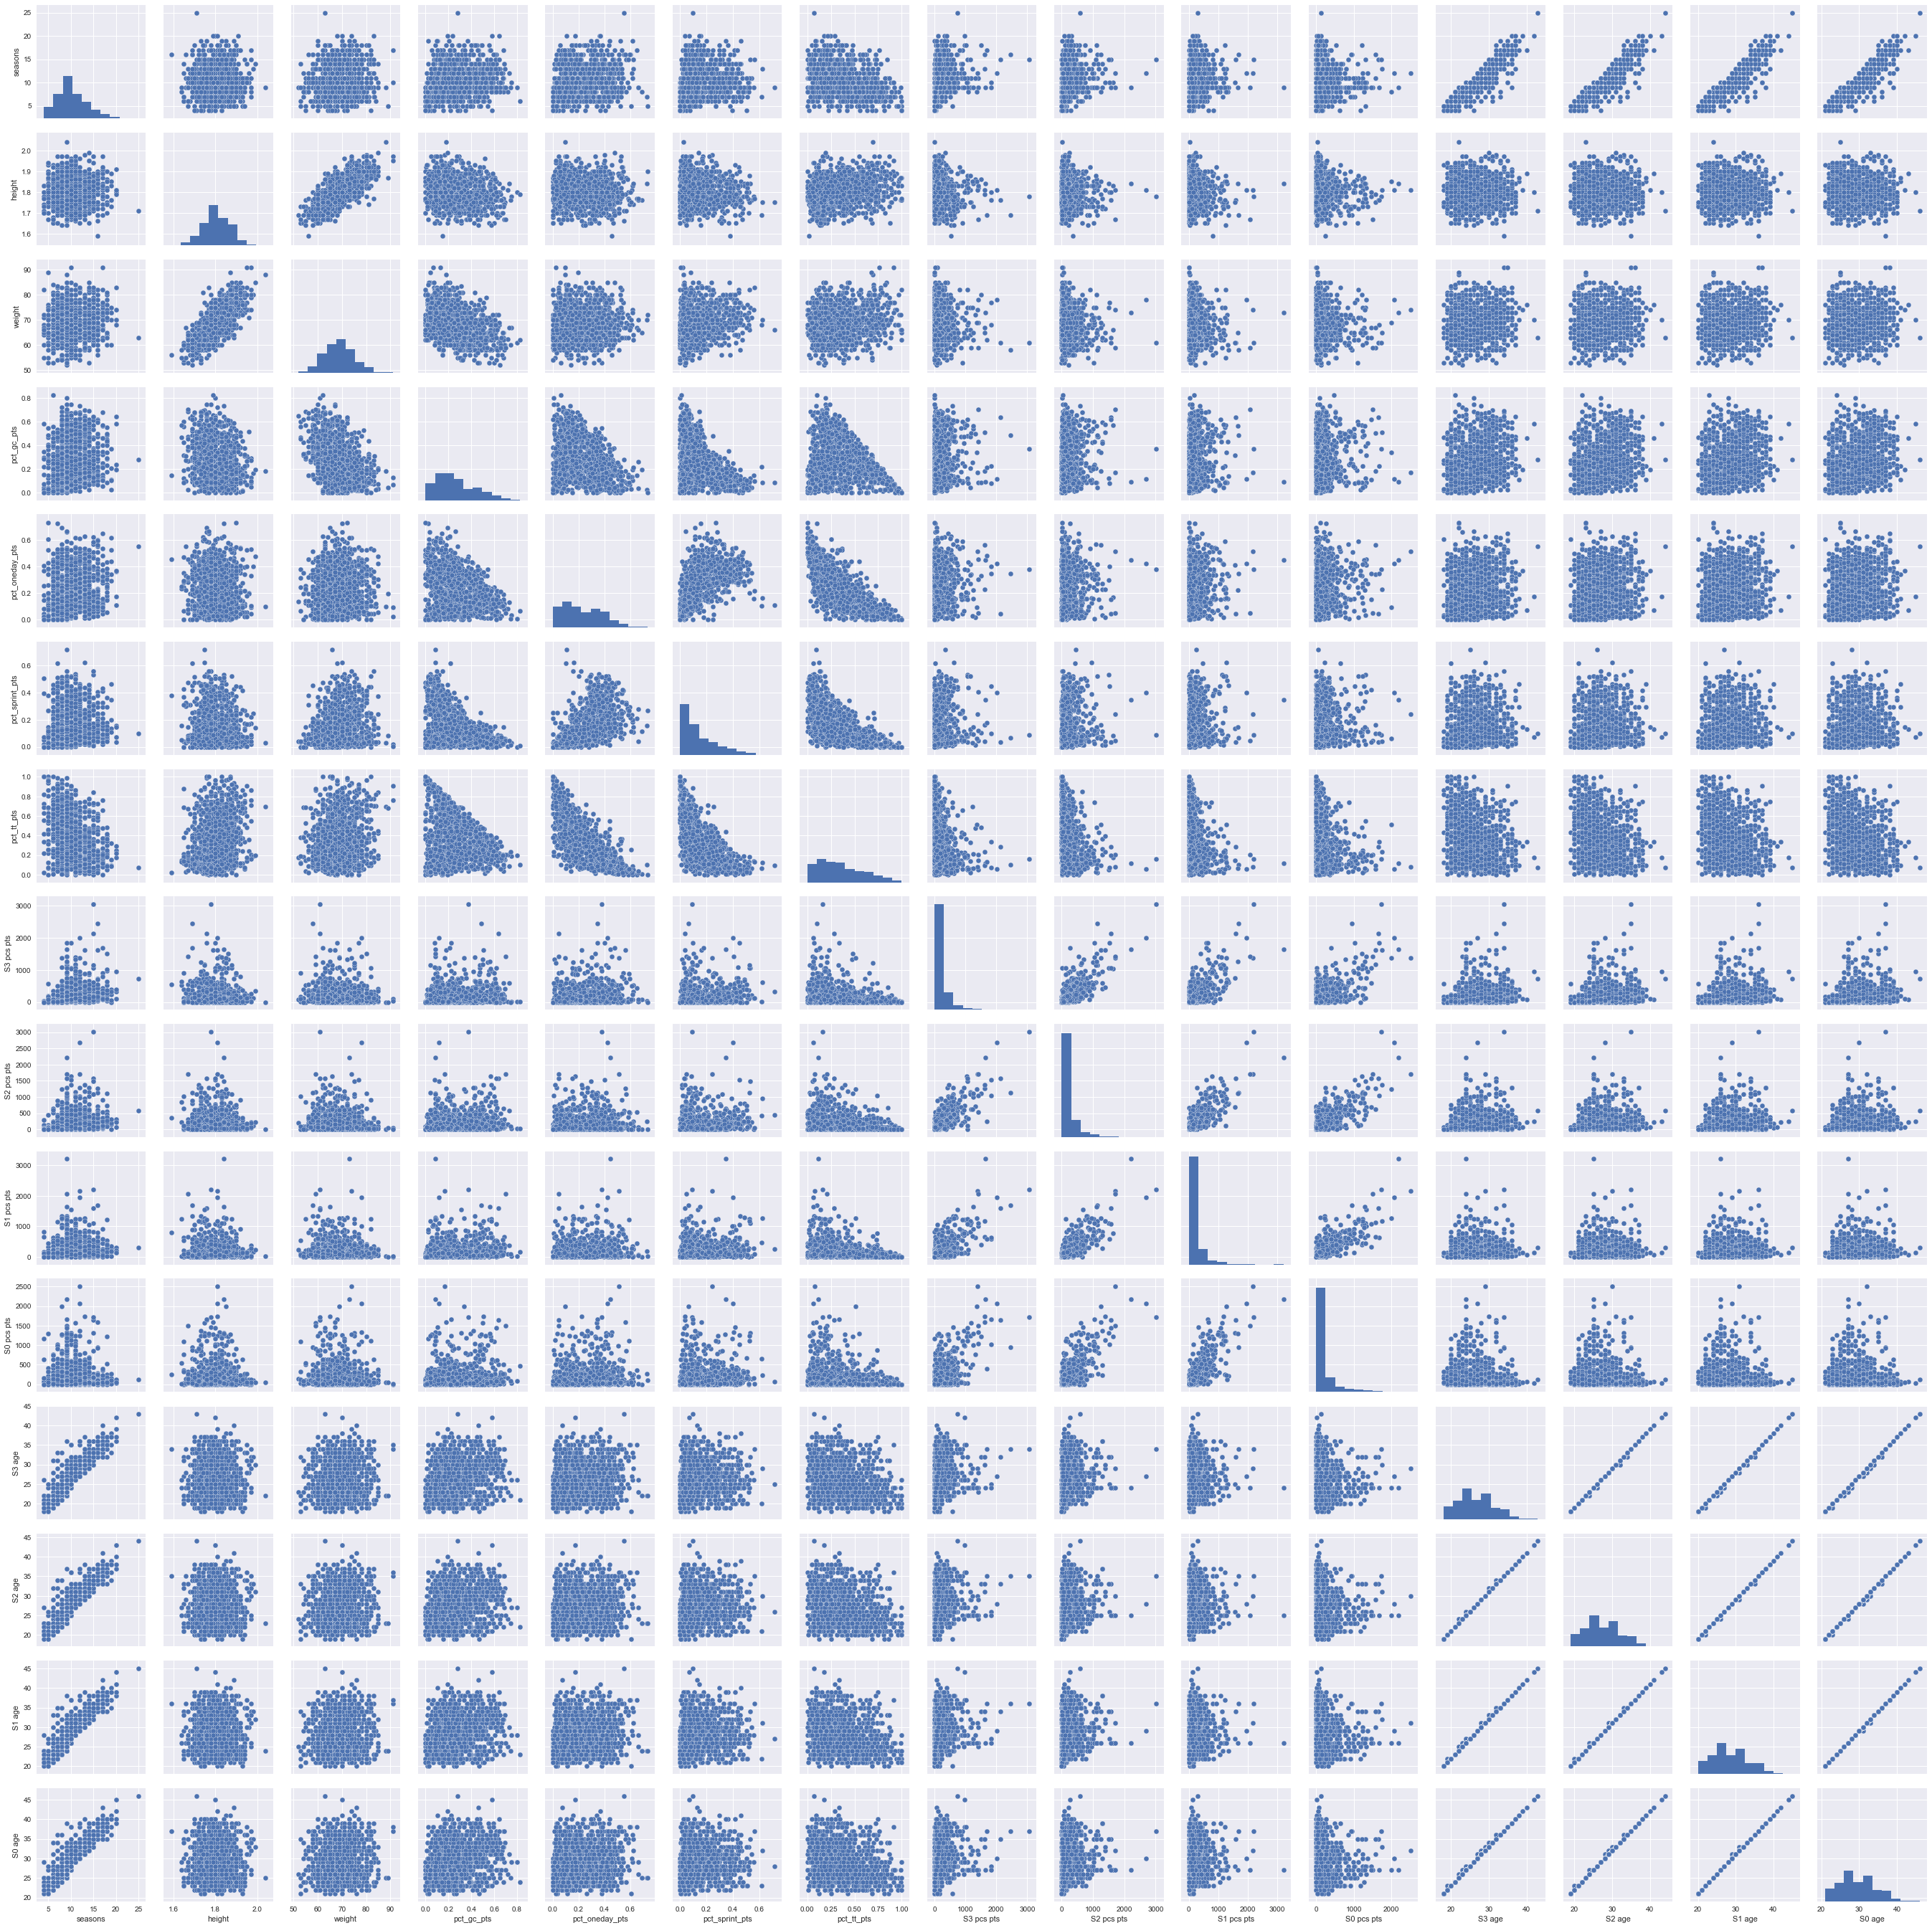

In [18]:
sns_plot = sns.pairplot(df_base)
sns_plot.savefig('baseline_pairplot.png')

Some intuitive positive correlations here between age/seasons and height/weight. But for the target (S0 pcs pts), most notable are the relationships with points in S1, S2, and S3 as we'd expect. Age doesn't seem to have as strong of a relationship as I'd thought.

In [19]:
# checking correlations
df_base.corr()

,seasons,height,weight,pct_gc_pts,pct_oneday_pts,pct_sprint_pts,pct_tt_pts,S3 pcs pts,S2 pcs pts,S1 pcs pts,S0 pcs pts,S3 age,S2 age,S1 age,S0 age
seasons,1.000000,0.027717,0.087713,0.198240,0.166585,0.092966,-0.302065,0.307579,0.209239,0.125740,-0.006228,0.897339,0.897128,0.896773,0.896430
height,0.027717,1.000000,0.733148,-0.186702,-0.103061,-0.074802,0.242790,-0.095228,-0.116024,-0.112249,-0.078180,-0.028348,-0.028074,-0.027941,-0.027711
weight,0.087713,0.733148,1.000000,-0.446546,0.036352,0.207935,0.183876,-0.062528,-0.089405,-0.088506,-0.073952,0.048763,0.048709,0.048559,0.049044
pct_gc_pts,0.198240,-0.186702,-0.446546,1.000000,-0.330449,-0.448754,-0.261047,0.157001,0.162967,0.138796,0.127594,0.216831,0.217569,0.217786,0.217837
pct_oneday_pts,0.166585,-0.103061,0.036352,-0.330449,1.000000,0.591960,-0.733006,0.155409,0.117738,0.139765,0.121868,0.125910,0.125860,0.125868,0.126038
pct_sprint_pts,0.092966,-0.074802,0.207935,-0.448754,0.591960,1.000000,-0.611891,0.131869,0.124243,0.158832,0.119922,0.067070,0.067174,0.067143,0.067338
pct_tt_pts,-0.302065,0.242790,0.183876,-0.261047,-0.733006,-0.611891,1.000000,-0.286688,-0.262543,-0.278453,-0.237227,-0.274963,-0.275523,-0.275667,-0.275921
S3 pcs pts,0.307579,-0.095228,-0.062528,0.157001,0.155409,0.131869,-0.286688,1.000000,0.792219,0.715909,0.670431,0.272138,0.272089,0.271776,0.271745
S2 pcs pts,0.209239,-0.116024,-0.089405,0.162967,0.117738,0.124243,-0.262543,0.792219,1.000000,0.809416,0.755540,0.189414,0.189038,0.188637,0.188454
S1 pcs pts,0.125740,-0.112249,-0.088506,0.138796,0.139765,0.158832,-0.278453,0.715909,0.809416,1.000000,0.796933,0.093936,0.093753,0.093242,0.093025


Some observations on **possible collinearity**: height and weight, percent GC/one-day/Sprint points, and the age features - all of which makes sense. Will need to keep this in mind during feature selection and modeling.

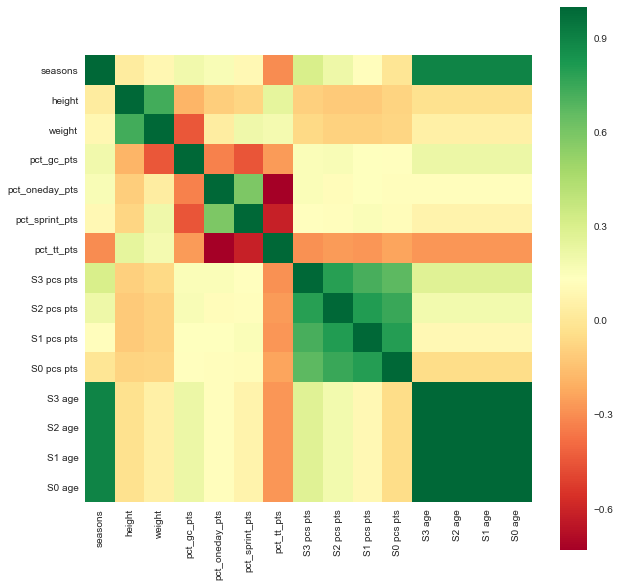

In [20]:
# correlations now in color!
plt.figure(figsize=(10,10))
sns.heatmap(df_base.corr(), square=True, cmap='RdYlGn');

The target (S0 pcs pts) looks pretty highly correlated with S3, S2, and S1 points. Somewhat surprisingly, the number of professional seasons a rider has under their belt doesn't appear to be correlated. Likewise there's a relatively low score for height, weight, and age.

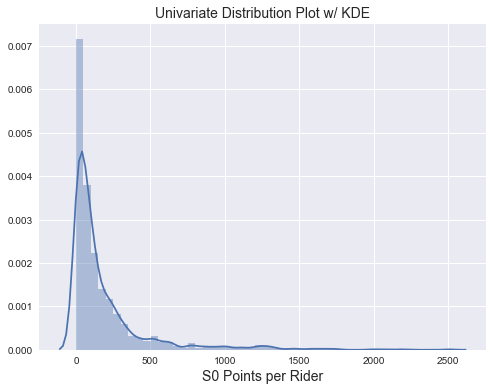

In [96]:
# let's check the distribution of target variable
plt.figure(figsize=(8,6))
sns.distplot(df_base['S0 pcs pts'])
plt.title('Univariate Distribution Plot w/ KDE', size=14);
plt.xlabel('S0 Points per Rider', size=14);

It's clear the points per rider and season is highly skewed, and this matches intuition since only a set number of top positions in each race's results earn any. I suspect if this distribution was compared to UCI points, PCS points would be less skewed because UCI points are more generously awarded in the top 10 and finishers further down the list get less than PCS.

### Create baseline linear regression model

In [22]:
# separate features from target
x = df_base.loc[:,['rider', 'seasons', 'height', 'weight', 'pct_gc_pts', 'pct_oneday_pts', 'pct_sprint_pts', 'pct_tt_pts',
            'S3 pcs pts', 'S2 pcs pts', 'S1 pcs pts', 'S3 age', 'S2 age', 'S1 age', 'S0 age']]
y = df_base['S0 pcs pts']

# split data to create a holdout set for final testing after model evaluation/selection
x_train, x_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_holdout.shape)
print(y_holdout.shape)

(882, 15)
(882,)
(221, 15)
(221,)


In [23]:
# create baseline OLS regression using only the immediately preceding season's points
x_base = x_train['S1 pcs pts']
y_base = y_train

model = sm.OLS(y_base,sm.add_constant(x_base))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S0 pcs pts   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1576.
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          2.57e-198
Time:                        05:53:43   Log-Likelihood:                -5845.0
No. Observations:                 882   AIC:                         1.169e+04
Df Residuals:                     880   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6868      7.470      3.439      0.001      11.026      40.348
S1 pcs pts     0.8275      0.021     39.697      0.000       0.787       0.868
==============================================================================
Omnibus:                      308.073   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3890.142
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                      12.996   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P value for S1's points confirms there is a meaningful relationship with the target. Also, the R-squared appears to be reasonable given there's only a single independent variable.

In [216]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

### Diagnostic plots

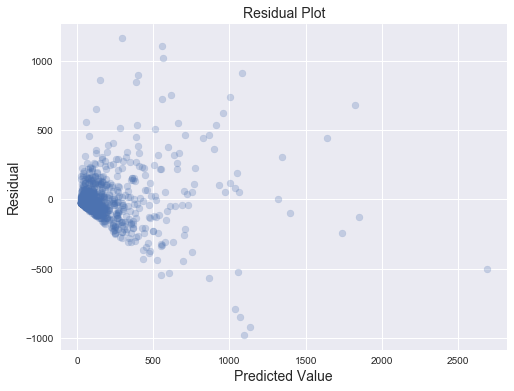

In [24]:
# taking a look at residuals
y_pred = results.predict(sm.add_constant(x_base))
plt.figure(figsize=(8,6))
plt.scatter(y_pred,y_base-y_pred,alpha=.25)
plt.title('Residual Plot',size=14)
plt.xlabel('Predicted Value',size=14)
plt.ylabel('Residual',size=14);

Here we see the characteristic cone or fan shape of heteroskedasticity, with the variance of the residuals increasing as the fitted values increase. This violates at least two of the assumptions of OLS regression: the error terms are not normally distributed with zero population mean, and the error terms do not have constant variance.

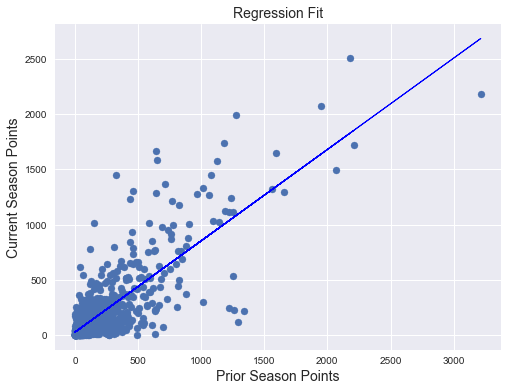

In [25]:
# taking a look at the regression fit
plt.figure(figsize=(8,6))
plt.scatter(x_base,y_base)
plt.plot(x_base, y_pred, color='blue',linewidth=1)
plt.title("Regression Fit", size=14)
plt.xlabel("Prior Season Points", size=14)
plt.ylabel("Current Season Points", size=14);

The regression's fit is much better for riders who score low or no points, compared to the 'outliers' or high performing cyclists scoring the most points. We can see that in more than a handful of cases, riders double or more the number of points they won from one season to another.

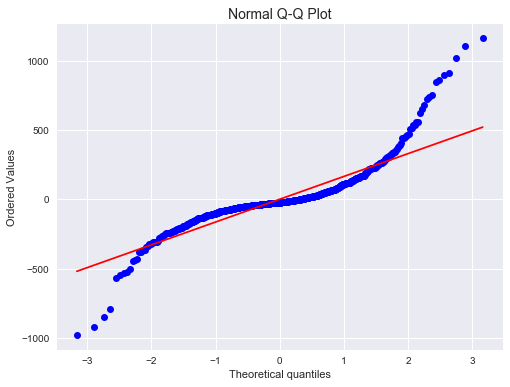

In [26]:
# probability plot against quantiles of a normal distribution
plt.figure(figsize=(8,6))
stats.probplot(y_base-y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot",size=14);

This wavy pattern further indicates that the target variable and base model don't conform to the assumptions of OLS regression. It's possible the model is underspecified, and perhaps can be improved through regularization, feature additions, and log transformation. Consider the situation where the error term is absorbing the omitted effect of an important variable. However, given the nature of winning points in cycling, which occurs for only a handful of riders per race, this might be a sign of 'pure heteroskedasticity' where even specifying the correct model results in non-constant variance in the residual plots. There are other unique aspects of road cycling vs. other sports' scoring that also may be at play.

### Cross validation and root mean squared error of baseline model

In [27]:
# running 5-fold cross validation on base linear regression model before trying above ideas
reg = LinearRegression()
x_base_1 = x_base.values.reshape(-1, 1)
scores = cross_val_score(reg, x_base_1, y_base, cv=5, scoring='neg_mean_squared_error')
print('average MSE:',np.mean(-scores))
print('MSE of each fold:',-scores)

average MSE: 33797.8662647
MSE of each fold: [ 26249.79699657  40904.46267144  38881.5552292   34679.56821975
  28273.94820676]


In [28]:
# take square root so the error is interpretable
rmse_scores = np.sqrt(-scores)
print('average RMSE:',np.mean(rmse_scores))
print('standard deviation of RMSEs:',np.std(rmse_scores))
print('RMSE of each fold:',rmse_scores)

average RMSE: 183.164714469
standard deviation of RMSEs: 15.7655839854
RMSE of each fold: [ 162.01789098  202.24851711  197.18406434  186.22451026  168.14858967]


On average across the 5 cross validation folds, the baseline model made predictions that were off by 183 points. The standard deviation of the individual scores is not too significant, but 183 points is quite large, considering that many riders such as 'domestiques' who serve more prominent team leaders (by blocking wind, shuttling food and drinks to/from team cars, etc.) don't even earn 100 points in a season.

In [29]:
# finally, R-squared values
r2_scores = cross_val_score(reg, x_base_1, y_base, cv=5)
print('average R-squared:',np.mean(r2_scores))
print('R-squared of each fold:',r2_scores)

average R-squared: 0.578352466955
R-squared of each fold: [ 0.77800408  0.50566393  0.72192526  0.27417508  0.61199399]


This average cross validated R-squared is lower than the statsmodels OLS regression's, as expected given the various splits of the training set. Note how poorly the model accounted for variance in the target in one of the folds.

### Adding a few features to baseline... up to 7

In [30]:
x_reg2 = x_train.loc[:,['seasons','pct_gc_pts','pct_tt_pts','S1 pcs pts','S2 pcs pts','S3 pcs pts','S0 age']]
y_reg2 = y_train

model = sm.OLS(y_reg2,sm.add_constant(x_reg2))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S0 pcs pts   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     303.4
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          6.44e-229
Time:                        05:53:44   Log-Likelihood:                -5754.1
No. Observations:                 882   AIC:                         1.152e+04
Df Residuals:                     874   BIC:                         1.156e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        366.8148     50.967      7.197      0.000     266.782     466.847
seasons       -4.8741      4.079     -1.195      0.232     -12.879       3.131
pct_gc_pts    53.9301     33.946      1.589      0.112     -12.694     120.554
pct_tt_pts   -44.5480     26.552     -1.678      0.094     -96.661       7.565
S1 pcs pts     0.4973      0.034     14.695      0.000       0.431       0.564
S2 pcs pts     0.2481      0.038      6.523      0.000       0.173       0.323
S3 pcs pts     0.1842      0.032      5.672      0.000       0.120       0.248
S0 age       -10.6299      2.751     -3.864      0.000     -16.030      -5.230
==============================================================================
Omnibus:                      252.798   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2555.956
Skew:                           0.999   Prob(JB):                         0.00
Kurtosis:                      11.097   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The addition of two more prior season's points helped the R-squared, however the S1 points coefficient decreased, giving up some 'explanatory power' to S2 and S3 points. The P value for the seasons feature (the total years racing as a professional) indicates it probably isn't too meaningful. Intuitively, the coefficients for percent of total points from GC (general classification) vs. TT (time trial) are reasonable. Time trials are usually beneficial for regaining lost time on overall GC standings but not as useful for winning points. Conversely if you're earning a higher percentage of points from GC that means a rider is making the points cutoff for finishing results and a high performer.

The low scale of 'pcs pts' coefficients is due to their relatively higher independent variable values, while 'pct gc/tt pts' have fractions as input.

**One big caveat** here is that P values are typically less reliable or accurate when the model exhibits heteroskedasticity. It's probable that the P values shown above are lower than they should be since one/more assumption of OLS is not met.

What about the cross validated R-squared and RMSE from scikit-learn?

In [31]:
r2_scores = cross_val_score(reg, x_reg2, y_reg2, cv=5)
rmse_scores = cross_val_score(reg, x_reg2, y_reg2, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)

print('average R-squared:',np.mean(r2_scores))
print('R-squared of each fold:',r2_scores,'\n')

print('average RMSE:',np.mean(rmse_scores))
print('standard deviation of RMSEs:',np.std(rmse_scores))
print('RMSE of each fold:',rmse_scores)

average R-squared: 0.654941065519
R-squared of each fold: [ 0.80131999  0.57904471  0.79501907  0.45456257  0.64475899] 

average RMSE: 166.30610037
standard deviation of RMSEs: 11.3585711459
RMSE of each fold: [ 153.27367481  186.63460774  169.29641962  161.43339185  160.89240783]


A decent improvement all around given the basic nature of the model. Let's see how the residuals look now.

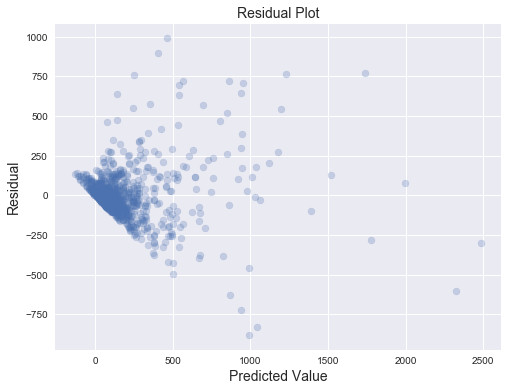

In [32]:
# taking a look at residuals
y_pred = results.predict(sm.add_constant(x_reg2))
plt.figure(figsize=(8,6))
plt.scatter(y_pred,y_reg2-y_pred,alpha=.25)
plt.title('Residual Plot',size=14)
plt.xlabel('Predicted Value',size=14)
plt.ylabel('Residual',size=14);

It's looking a tiny bit better but still highly concentrated at fitted values near zero. Next it would be worthwhile to try adding some more features and seeing how scaling / regularization affects the results.

### Adding even more features... up to 74

In [33]:
pcs_cols = ['S8 pcs pts','S7 pcs pts','S6 pcs pts','S5 pcs pts','S4 pcs pts',
            'S3 pcs pts','S2 pcs pts','S1 pcs pts','S0 pcs pts']
age_cols = ['S8 age','S7 age','S6 age','S5 age','S4 age','S3 age','S2 age','S1 age','S0 age']
select_cols = ['pct_gc_pts','pct_oneday_pts','pct_sprint_pts','pct_tt_pts','nationality'] + pcs_cols + age_cols

df_8seasons = df[select_cols]
df_8seasons = df_8seasons.dropna()
df_8seasons.shape

(1192, 23)

In [34]:
# since nationality is categorical, convert to dummy variables and drop the original string one
nation_dummies = pd.get_dummies(df_8seasons['nationality'], drop_first=True)
df_8seasons = pd.concat([df_8seasons, nation_dummies], axis=1)
df_8seasons.drop('nationality', axis=1, inplace=True)
df_8seasons.head()

,pct_gc_pts,pct_oneday_pts,pct_sprint_pts,pct_tt_pts,S8 pcs pts,S7 pcs pts,S6 pcs pts,S5 pcs pts,S4 pcs pts,S3 pcs pts,...,South Africa,Spain,Sweden,Switzerland,Taiwan,Ukraine,United Arab Emirates,United States,Uruguay,Venezuela
0,0.143939,0.108586,0.101010,0.646465,0.0,0.0,6.0,10.0,16.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0.160503,0.338544,0.294319,0.206634,19.0,342.0,176.0,419.0,154.0,133.0,...,0,0,0,0,0,0,0,0,0,0
4,0.465126,0.094159,0.074978,0.365737,123.0,129.0,94.0,99.0,230.0,349.0,...,0,0,0,0,0,0,0,0,0,0
5,0.184502,0.049200,0.003690,0.762608,0.0,0.0,0.0,0.0,25.0,28.0,...,0,0,0,0,0,0,0,0,0,0
6,0.475949,0.303165,0.049051,0.171835,0.0,5.0,0.0,0.0,29.0,624.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
for col in df_8seasons.columns:
    print(df_8seasons.columns.get_loc(col),col)

0 pct_gc_pts
1 pct_oneday_pts
2 pct_sprint_pts
3 pct_tt_pts
4 S8 pcs pts
5 S7 pcs pts
6 S6 pcs pts
7 S5 pcs pts
8 S4 pcs pts
9 S3 pcs pts
10 S2 pcs pts
11 S1 pcs pts
12 S0 pcs pts
13 S8 age
14 S7 age
15 S6 age
16 S5 age
17 S4 age
18 S3 age
19 S2 age
20 S1 age
21 S0 age
22 Algeria
23 Argentina
24 Australia
25 Austria
26 Belarus
27 Belgium
28 Brazil
29 Bulgaria
30 Canada
31 China
32 Colombia
33 Costa Rica
34 Croatia
35 Cuba
36 Czech Republic
37 Denmark
38 Eritrea
39 Estonia
40 Finland
41 France
42 Germany
43 Great Britain
44 Hongkong
45 Ireland
46 Italy
47 Japan
48 Kazakhstan
49 Latvia
50 Lithuania
51 Luxembourg
52 Mexico
53 Moldova
54 Namibia
55 Netherlands
56 New Zealand
57 Norway
58 Poland
59 Portugal
60 Romania
61 Russia
62 Rwanda
63 Slovakia
64 Slovenia
65 South Africa
66 Spain
67 Sweden
68 Switzerland
69 Taiwan
70 Ukraine
71 United Arab Emirates
72 United States
73 Uruguay
74 Venezuela


In [36]:
x = df_8seasons.iloc[:, np.r_[0:12, 13:len(df_8seasons.columns)]]
y = df_8seasons['S0 pcs pts']

x_train, x_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_holdout.shape)
print(y_holdout.shape)

(953, 74)
(953,)
(239, 74)
(239,)


In [37]:
# OLS model with rider nation dummies
model = sm.OLS(y_train,sm.add_constant(x_train))
results = model.fit()

results.summary()

/Users/Arjun/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/Arjun/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Arjun/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Arjun/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S0 pcs pts   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     41.10
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          1.76e-227
Time:                        05:53:44   Log-Likelihood:                -6075.5
No. Observations:                 953   AIC:                         1.229e+04
Df Residuals:                     884   BIC:                         1.262e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  252.5533    109.039      2.316      0.021      38.548     466.559
pct_gc_pts              60.9843     36.012      1.693      0.091      -9.695     131.663
pct_oneday_pts          89.7959     48.305      1.859      0.063      -5.009     184.601
pct_sprint_pts          31.9912     48.887      0.654      0.513     -63.956     127.939
pct_tt_pts              69.7818     32.090      2.175      0.030       6.800     132.763
S8 pcs pts              -0.0691      0.031     -2.226      0.026      -0.130      -0.008
S7 pcs pts               0.0208      0.034      0.616      0.538      -0.045       0.087
S6 pcs pts               0.0797      0.030      2.661      0.008       0.021       0.139
S5 pcs pts              -0.1436      0.031     -4.592      0.000      -0.205      -0.082
S4 pcs pts               0.0017      0.031      0.053      0.957      -0.060       0.063
S3 pcs pts               0.1921      0.032      6.007      0.000       0.129       0.255
S2 pcs pts               0.3113      0.032      9.671      0.000       0.248       0.375
S1 pcs pts               0.5231      0.032     16.148      0.000       0.460       0.587
S8 age                   9.0930     23.652      0.384      0.701     -37.327      55.513
S7 age                  -6.1364     40.204     -0.153      0.879     -85.043      72.770
S6 age                  64.9535     66.705      0.974      0.330     -65.965     195.872
S5 age                -117.8524     96.076     -1.227      0.220    -306.417      70.712
S4 age                  53.5787     88.686      0.604      0.546    -120.482     227.639
S3 age                  33.0016     56.169      0.588      0.557     -77.238     143.241
S2 age                 -38.0073     53.938     -0.705      0.481    -143.869      67.855
S1 age                  -6.5199     61.365     -0.106      0.915    -126.958     113.918
S0 age                  -1.2473     45.107     -0.028      0.978     -89.776      87.281
Algeria               8.292e-14   1.55e-13      0.535      0.593   -2.21e-13    3.87e-13
Argentina               95.5598     87.234      1.095      0.274     -75.650     266.770
Australia               -1.5948     26.035     -0.061      0.951     -52.692      49.502
Austria                 49.6205     47.096      1.054      0.292     -42.812     142.053
Belarus                -71.9102     56.062     -1.283      0.200    -181.940      38.120
Belgium                 13.0262     18.935      0.688      0.492     -24.136      50.189
Brazil                  43.2833     85.194      0.508      0.612    -123.922     210.489
Bulgaria               -23.3547    102.991     -0.227      0.821    -225.489     178.780
Canada                  38.2782     47.500      0.806      0.421     -54.947     131.503
China                   -2.2965     84.655     -0.027    

In [38]:
# cross validation linear regression with the same 74 features
r2_scores = cross_val_score(reg, x_train, y_train, cv=5)
rmse_scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)

print('average R-squared:',np.mean(r2_scores))
print('R-squared of each fold:',r2_scores,'\n')

print('average RMSE:',np.mean(rmse_scores))
print('standard deviation of RMSEs:',np.std(rmse_scores))
print('RMSE of each fold:',rmse_scores)

average R-squared: -1.38226974597e+16
R-squared of each fold: [ -1.00060853e+15  -6.80944776e+16  -1.84011873e+13   6.94836189e-01
   6.28418464e-01] 

average RMSE: 14752532792.8
standard deviation of RMSEs: 24477780018.4
RMSE of each fold: [  8.89314854e+09   6.32639613e+10   1.60555382e+09   1.41359212e+02
   1.66269421e+02]


### Scaling and Regularization
Okay, the sparse dummy features are causing problems. Time to scale the variables and regularize.

In [39]:
# scale the training set
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)

In [40]:
# split the training set into 5 folds for alpha selection
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Lasso

In [41]:
alphavec = np.logspace(-5,5,40)

reg_lasso = LassoCV(alphas = alphavec, cv=kfold)
reg_lasso.fit(x_train_scaled,y_train)

/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-05,   1.80472e-05,   3.25702e-05,   5.87802e-05,
         1.06082e-04,   1.91448e-04,   3.45511e-04,   6.23551e-04,
         1.12534e-03,   2.03092e-03,   3.66524e-03,   6.61474e-03,
         1.19378e-02,   2.15443e-02,   3.88816e-02,   7.01704e-02,
         1.26638e-01,   2...3,   5.22335e+03,   9.42668e+03,
         1.70125e+04,   3.07029e+04,   5.54102e+04,   1.00000e+05]),
    copy_X=True, cv=KFold(n_splits=5, random_state=0, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [42]:
# best alpha found by LassoCV
reg_lasso.alpha_

4.3754793750741801

In [43]:
# coefficients after refitting using best alpha
list(zip(x_train.columns,reg_lasso.coef_))

[('pct_gc_pts', 0.0),
 ('pct_oneday_pts', 0.0),
 ('pct_sprint_pts', -0.0),
 ('pct_tt_pts', -0.0),
 ('S8 pcs pts', -7.0113941356331857),
 ('S7 pcs pts', -0.0),
 ('S6 pcs pts', 1.6220848590342518),
 ('S5 pcs pts', -18.369106109938702),
 ('S4 pcs pts', 0.0),
 ('S3 pcs pts', 49.207765990151444),
 ('S2 pcs pts', 85.65394088480133),
 ('S1 pcs pts', 139.44255386445425),
 ('S8 age', -0.0),
 ('S7 age', -0.0),
 ('S6 age', -0.0),
 ('S5 age', -0.0),
 ('S4 age', -0.0),
 ('S3 age', -0.0),
 ('S2 age', -32.494136707637459),
 ('S1 age', -0.60266720183852707),
 ('S0 age', -1.1595658579122765),
 ('Algeria', 0.0),
 ('Argentina', 0.0),
 ('Australia', -0.0),
 ('Austria', 0.0),
 ('Belarus', -2.352119772834274),
 ('Belgium', 0.0),
 ('Brazil', 0.0),
 ('Bulgaria', -0.0),
 ('Canada', 0.0),
 ('China', -0.0),
 ('Colombia', 0.65157910721535195),
 ('Costa Rica', -0.0),
 ('Croatia', -0.0),
 ('Cuba', 0.0),
 ('Czech Republic', -3.9432952929231537),
 ('Denmark', -0.0),
 ('Eritrea', -0.21779216148269037),
 ('Estonia', -1

In [44]:
def build_grid_search_est(model, X, y, cv=5, **params):
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#        plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

Lasso Grid Search


/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

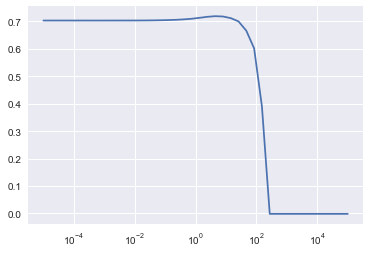

In [45]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), x_train_scaled, y_train, cv=kfold,
                                       alpha=np.logspace(-5, 5, 40))

Many of the nationality dummies, most of the ages, a few of the earlier seasons' points, and all of the percentage of points by race type have been set to zero. I'm skeptical that the remaining nationality dummies with non-zero coefficients are actually appropriate for a well-generalizing model.  Taking a look at its predictions, RMSE, and residuals...

In [46]:
reg_lasso.score(x_train_scaled,y_train)

0.74952060623322381

In [47]:
r2_scores = cross_val_score(reg_lasso, x_train_scaled, y_train, cv=kfold)
rmse_scores = cross_val_score(reg_lasso, x_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)

print('average R-squared:',np.mean(r2_scores))
print('R-squared of each fold:',r2_scores,'\n')

print('average RMSE:',np.mean(rmse_scores))
print('standard deviation of RMSEs:',np.std(rmse_scores))
print('RMSE of each fold:',rmse_scores)

/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

average R-squared: 0.715005260424
R-squared of each fold: [ 0.78310795  0.76949669  0.70535389  0.65579217  0.6612756 ] 

average RMSE: 151.296298369
standard deviation of RMSEs: 13.498086819
RMSE of each fold: [ 161.02208358  145.18677981  134.53524356  172.21701879  143.5203661 ]


**Lasso vs OLS Regression:** The R-squared is about 0.06 higher and average RMSE is 15 lower for Lasso, compared to the OLS regression with just a few more features than baseline.

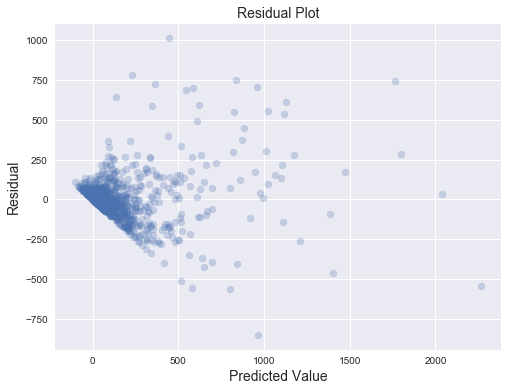

In [48]:
# taking a look at residuals again from Lasso
y_pred = reg_lasso.predict(x_train_scaled)
plt.figure(figsize=(8,6))
plt.scatter(y_pred,y_train-y_pred,alpha=.25)
plt.title('Residual Plot',size=14)
plt.xlabel('Predicted Value',size=14)
plt.ylabel('Residual',size=14);

However, the residual plot for Lasso doesn't really look much different than for the OLS model. The concentration around fitted values of zero and increasing variance with higher predicted values is persistent.

I'll only keep the features which didn't have coefficients pushed down to zero by Lasso, and see how the OLS performs.

In [49]:
lasso_coeff = list(zip(x_train.columns,reg_lasso.coef_))

for item in lasso_coeff:
    if item[1] != 0.0:
        print(item)

('S8 pcs pts', -7.0113941356331857)
('S6 pcs pts', 1.6220848590342518)
('S5 pcs pts', -18.369106109938702)
('S3 pcs pts', 49.207765990151444)
('S2 pcs pts', 85.65394088480133)
('S1 pcs pts', 139.44255386445425)
('S2 age', -32.494136707637459)
('S1 age', -0.60266720183852707)
('S0 age', -1.1595658579122765)
('Belarus', -2.352119772834274)
('Colombia', 0.65157910721535195)
('Czech Republic', -3.9432952929231537)
('Eritrea', -0.21779216148269037)
('Estonia', -10.028053908453931)
('Ireland', 10.154365174910227)
('Netherlands', 1.4235928677909182)
('Poland', 3.629452220163135)
('Russia', -6.8903362665953889)
('Slovenia', 0.91725202299478992)
('Switzerland', 0.48366141355456832)
('Venezuela', 0.089290918352911572)


In [50]:
keep_features = [item[0] for item in lasso_coeff if item[1] != 0.0]
print('number of features to keep:',len(keep_features))
print(keep_features)

number of features to keep: 21
['S8 pcs pts', 'S6 pcs pts', 'S5 pcs pts', 'S3 pcs pts', 'S2 pcs pts', 'S1 pcs pts', 'S2 age', 'S1 age', 'S0 age', 'Belarus', 'Colombia', 'Czech Republic', 'Eritrea', 'Estonia', 'Ireland', 'Netherlands', 'Poland', 'Russia', 'Slovenia', 'Switzerland', 'Venezuela']


### OLS on Training Set with 21 features selected by Lasso

In [51]:
y_train.shape

(953,)

In [52]:
df_y_train = pd.DataFrame(y_train).reset_index(drop=True)
df_y_train.head()

,S0 pcs pts
0,205.0
1,0.0
2,102.0
3,519.0
4,133.0


In [112]:
df_y_train.shape

(953, 1)

In [113]:
x_train_21 = x_train.loc[:,keep_features]
x_train_21.head()

,S8 pcs pts,S6 pcs pts,S5 pcs pts,S3 pcs pts,S2 pcs pts,S1 pcs pts,S2 age,S1 age,S0 age,Belarus,...,Czech Republic,Eritrea,Estonia,Ireland,Netherlands,Poland,Russia,Slovenia,Switzerland,Venezuela
319,202.0,170.0,404.0,463.0,239.0,696.0,33.0,34.0,35,0,...,0,0,0,0,0,0,0,0,0,0
1014,32.0,0.0,0.0,0.0,18.0,5.0,24.0,25.0,26,0,...,0,0,0,0,0,0,0,0,1,0
954,1.0,96.0,234.0,162.0,93.0,174.0,27.0,28.0,29,0,...,0,0,0,0,0,0,0,0,0,0
621,10.0,245.0,251.0,310.0,424.0,408.0,28.0,29.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1134,1009.0,110.0,380.0,534.0,454.0,102.0,31.0,32.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
std = StandardScaler()
std.fit(x_train_21)
x_train_21_scaled = std.transform(x_train_21)
df_x_train_21_scaled = pd.DataFrame(x_train_21_scaled,columns=x_train_21.columns)

In [115]:
df_x_train_21_scaled.head()

,S8 pcs pts,S6 pcs pts,S5 pcs pts,S3 pcs pts,S2 pcs pts,S1 pcs pts,S2 age,S1 age,S0 age,Belarus,...,Czech Republic,Eritrea,Estonia,Ireland,Netherlands,Poland,Russia,Slovenia,Switzerland,Venezuela
0,0.174800,-0.074836,0.565123,0.832191,0.113015,1.870999,0.826212,0.822131,0.818313,-0.086021,...,-0.086021,-0.045859,-0.045859,-0.072624,-0.259209,-0.138749,-0.177159,-0.108061,-0.160730,-0.072624
1,-0.416975,-0.655804,-0.703686,-0.712223,-0.635558,-0.650192,-1.445076,-1.444477,-1.445045,-0.086021,...,-0.086021,-0.045859,-0.045859,-0.072624,-0.259209,-0.138749,-0.177159,-0.108061,6.221602,-0.072624
2,-0.524886,-0.327728,0.031218,-0.171845,-0.381517,-0.033576,-0.687980,-0.688941,-0.690592,-0.086021,...,-0.086021,-0.045859,-0.045859,-0.072624,-0.259209,-0.138749,-0.177159,-0.108061,-0.160730,-0.072624
3,-0.493557,0.181473,0.084609,0.321834,0.739648,0.820199,-0.435615,-0.437096,-0.439108,-0.086021,...,-0.086021,-0.045859,-0.045859,-0.072624,-0.259209,-0.138749,-0.177159,-0.108061,-0.160730,-0.072624
4,2.983990,-0.279884,0.489748,1.069024,0.841264,-0.296277,0.321481,0.318440,0.315345,-0.086021,...,-0.086021,-0.045859,-0.045859,-0.072624,-0.259209,-0.138749,-0.177159,-0.108061,-0.160730,-0.072624


In [125]:
model = sm.OLS(df_y_train,sm.add_constant(df_x_train_21_scaled))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             S0 pcs pts   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     137.6
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          5.15e-268
Time:                        13:25:57   Log-Likelihood:                -6082.1
No. Observations:                 953   AIC:                         1.221e+04
Df Residuals:                     931   BIC:                         1.232e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            159.0399      4.688     33.927      0.000     149.840     168.240
S8 pcs pts       -17.0648      7.246     -2.355      0.019     -31.285      -2.844
S6 pcs pts        24.5740      7.899      3.111      0.002       9.072      40.076
S5 pcs pts       -43.7206      8.857     -4.936      0.000     -61.103     -26.339
S3 pcs pts        56.3278      8.761      6.429      0.000      39.133      73.522
S2 pcs pts        91.4350      9.183      9.957      0.000      73.413     109.457
S1 pcs pts       143.5657      8.353     17.187      0.000     127.172     159.959
S2 age           -18.9144    161.449     -0.117      0.907    -335.761     297.932
S1 age            -2.4076    231.293     -0.010      0.992    -456.323     451.508
S0 age           -14.5965    167.574     -0.087      0.931    -343.464     314.270
Belarus           -7.1375      4.703     -1.518      0.129     -16.367       2.092
Colombia           5.7568      4.740      1.215      0.225      -3.545      15.059
Czech Republic    -8.3667      4.704     -1.779      0.076     -17.599       0.865
Eritrea           -5.0825      4.698     -1.082      0.280     -14.302       4.137
Estonia          -15.1782      4.708     -3.224      0.001     -24.418      -5.939
Ireland           13.8553      4.712      2.940      0.003       4.608      23.103
Netherlands        5.5938      4.737      1.181      0.238      -3.702      14.890
Poland             7.5260      4.728      1.592      0.112      -1.752      16.804
Russia           -11.2594      4.716     -2.387      0.017     -20.515      -2.003
Slovenia           5.5888      4.703      1.188      0.235      -3.641      14.819
Switzerland        5.2134      4.708      1.107      0.268      -4.027      14.454
Venezuela          4.5939      4.703      0.977      0.329      -4.635      13.823
==============================================================================
Omnibus:                      286.901   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3259.045
Skew:                           1.036   Prob(JB):                         0.00
Kurtosis:                      11.819   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, I'm skeptical of some of the P values for the nationality dummies which have now been scaled to non-zero and non-one values. While the Lasso with all 74 features appeared to prefer the ones above, the statsmodels output suggests (based on P value alone) reconsidering Colombia, Netherlands, etc. as well as the Age features. Perhaps these are 'unnecessary' for prediction within the training set now that all features are scaled.

Taking a look at cross validated scikit-learn regression...

In [126]:
r2_scores = cross_val_score(reg, df_x_train_21_scaled, df_y_train, cv=5)
rmse_scores = cross_val_score(reg, df_x_train_21_scaled, df_y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-rmse_scores)

print('average R-squared:',np.mean(r2_scores))
print('R-squared of each fold:',r2_scores,'\n')

print('average RMSE:',np.mean(rmse_scores))
print('standard deviation of RMSEs:',np.std(rmse_scores))
print('RMSE of each fold:',rmse_scores)

average R-squared: 0.71020349898
R-squared of each fold: [ 0.61961628  0.71968092  0.84093358  0.70606689  0.66471983] 

average RMSE: 149.540460243
standard deviation of RMSEs: 15.5244187362
RMSE of each fold: [ 173.39413664  128.35912966  149.27641658  138.73366464  157.93895369]


Result is similar to Lasso, but slightly lower R^2 and RMSE.

### Testing the Holdout

In [134]:
# limit holdout to 21 features and scale
x_holdout_21 = x_holdout.loc[:, keep_features]

std = StandardScaler()
std.fit(x_holdout_21)
x_holdout_21_scaled = std.transform(x_holdout_21)

In [180]:
# refit LR on training data
reg = LinearRegression()
reg.fit(df_x_train_21_scaled, df_y_train)

# make prediction on holdout and get scores
y_holdout_pred = reg.predict(x_holdout_21_scaled)
print('R-squared of holdout set:',reg.score(x_holdout_21_scaled, y_holdout))
print('RMSE of holdout set:',RMSE(y_holdout,y_holdout_pred))

R-squared of holdout set: 0.687456960931
RMSE of holdout set: 137.886186648


In [223]:
# now with statsmodels
y_holdout_pred_statsmodels = results.predict(sm.add_constant(x_holdout_21_scaled))

print('RMSE of holdout set:',RMSE(y_holdout,y_holdout_pred_statsmodels))

RMSE of holdout set: 137.886186648


**Conclusion**

The results on out of sample data are pretty good. While R^2 dropped a negligible 0.02, the RMSE is also 11.65 lower, compared to the 5-fold cross validation averages.

**Next Steps**
- dealing with skewness in the target distribution
  - applying log or Box Cox transformation
- exploring the effect of higher degree polynomial terms as independent variables
- trying other non-linear models to handle bias and classification component between rider specialties
  - random forest regressor
  - gradient boosting trees